In [210]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Softmax, BatchNormalization
from keras.initializers import GlorotNormal, GlorotUniform

In [211]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Fetal Health Classifier

Dataset: https://www.kaggle.com/andrewmvd/fetal-health-classification

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318



#### Import Data


In [212]:
df = pd.read_csv('data/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### EDA

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [214]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

No hay datos faltantes.

In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Todas las variables son numericas o categoricas con una representacion numerica, por lo que no es necesario aplicar codificacion de variables categoricas.

#### Visualizacion de datos.

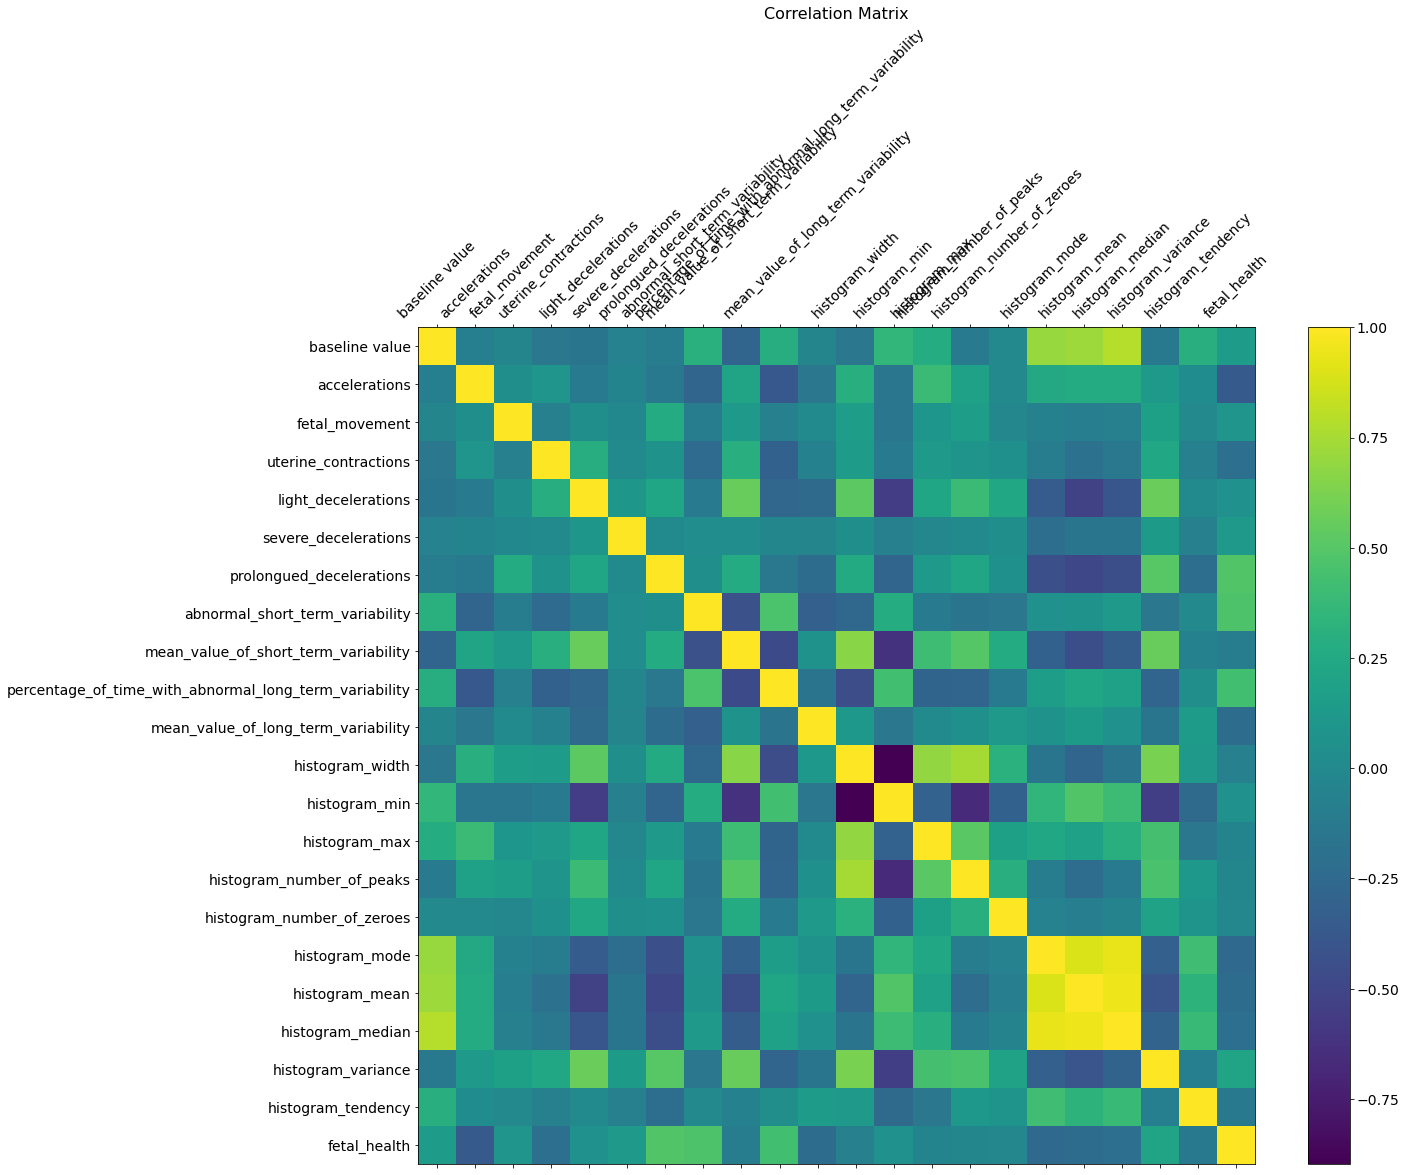

In [216]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [217]:
df["fetal_health"] -= 1

<AxesSubplot:>

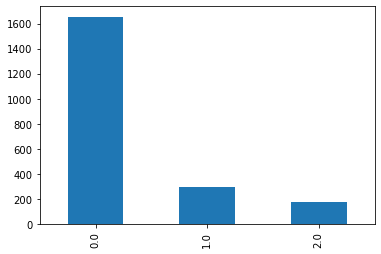

In [218]:
df["fetal_health"].value_counts().plot(kind='bar')

Aparentemente el dataset esta desbalanceado. Tenemos mas ejemplos de fetos normales. Que las otras dos clases. 

Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

In [219]:
def draw_kde(df):
    k = len(df.columns)
    n = 2
    m = (k - 1) // n + 1
    fig, axes = plt.subplots(m, n, figsize=(n * 8, m * 4))
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        col.hist(ax=ax)
        col.plot.kde(ax=ax, secondary_y=True, title=name)
    plt.show()

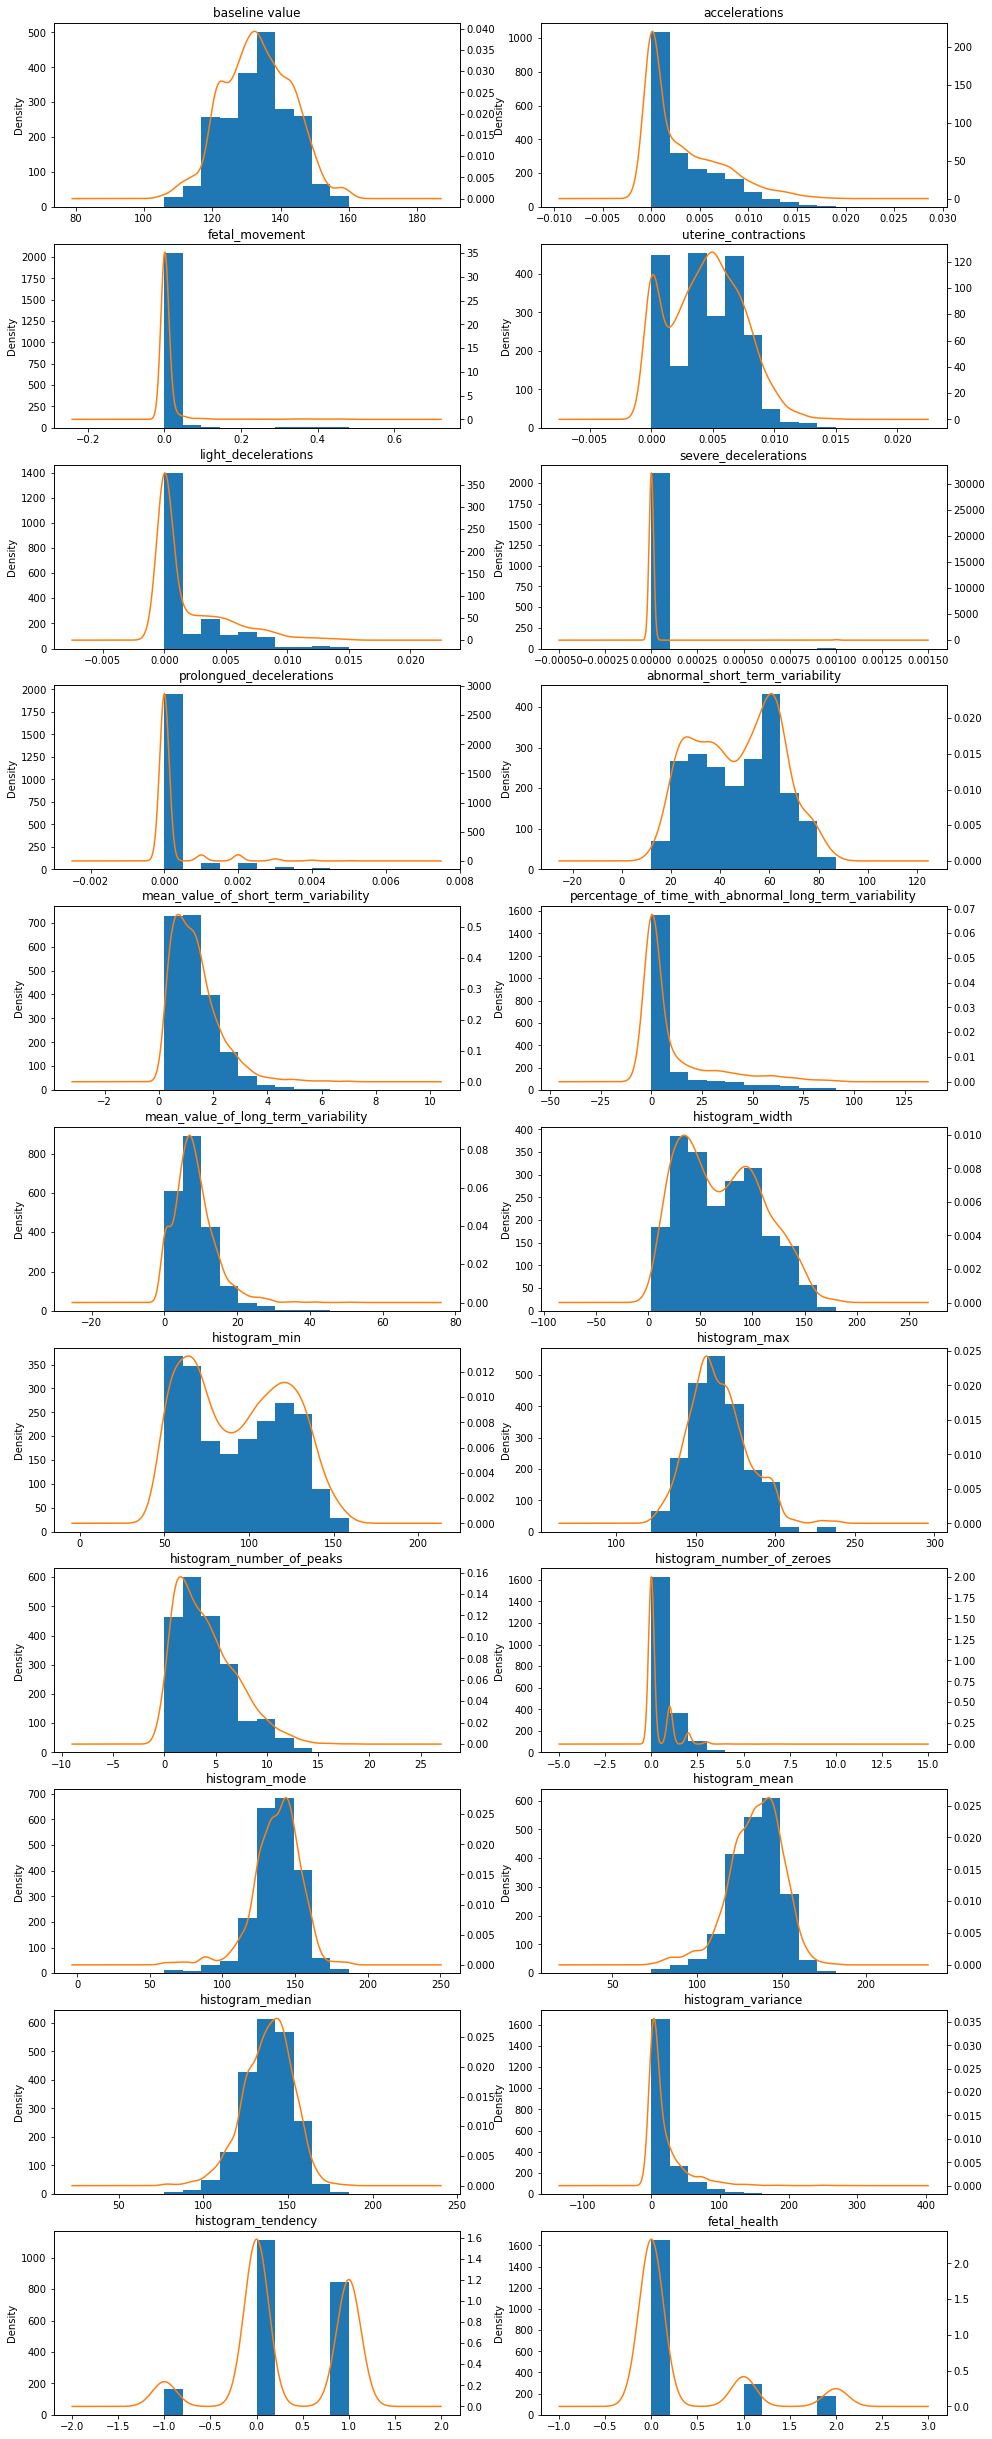

In [220]:
draw_kde(df)

#### Train Test Split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'fetal_health'], df['fetal_health'], test_size = 0.3, random_state = 5)

In [222]:
X_train.shape

(1488, 21)

In [223]:
X_test.shape

(638, 21)

#### Data Normalization

In [224]:
scaler = StandardScaler()

In [225]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 6.81219628e-01, -5.65811964e-01, -2.00408093e-01, ...,
         8.80743846e-01, -5.98991880e-01,  1.03172960e+00],
       [ 6.96556655e-02,  4.39725733e-01, -1.74504454e-01, ...,
         6.10104677e-01, -8.32109610e-02,  1.03172960e+00],
       [-3.38053643e-01, -8.17196389e-01, -2.00408093e-01, ...,
         1.16654814e-03, -7.09516362e-01, -5.65948759e-01],
       ...,
       [-7.45762951e-01, -8.17196389e-01, -2.00408093e-01, ...,
        -2.69472620e-01, -6.35833374e-01, -5.65948759e-01],
       [ 5.79292301e-01, -6.30431158e-02, -2.00408093e-01, ...,
         2.71805717e-01, -5.98991880e-01, -5.65948759e-01],
       [-2.36126316e-01, -8.17196389e-01,  8.47731105e+00, ...,
        -2.43458597e+00,  4.74302478e+00, -2.16362712e+00]])

In [226]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.13181137,  2.58288705, -0.20584599, ...,  0.47913161,
         1.93099393,  1.15040612],
       [-0.03029205, -0.82502285, -0.18572123, ..., -0.21894715,
        -0.52543822, -0.50671325],
       [ 0.17274657, -0.56287594, -0.16559647, ...,  0.19990011,
        -0.55908797,  1.15040612],
       ...,
       [ 0.68034314, -0.82502285, -0.20584599, ...,  0.96778673,
        -0.55908797, -0.50671325],
       [ 1.0864204 ,  0.48571173, -0.20584599, ...,  1.10740248,
        -0.45813871, -0.50671325],
       [ 0.07122726,  0.22356481, -0.18572123, ..., -0.00952352,
         0.08025738,  1.15040612]])

In [227]:
X_train.shape

(1488, 21)

#### Analyze class imbalance


In [228]:
labels_freq = y_train.value_counts()/y_train.shape[0]
print(labels_freq)

0.0    0.770833
1.0    0.141129
2.0    0.088038
Name: fetal_health, dtype: float64


In [229]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(df['fetal_health']), y=df['fetal_health'])
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}

In [230]:
#### Trainning Callbacks
def _get_checkpoint_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f"{path}/experiment_{experiment_id}/checkpoint_{experiment_id}", 
                                                               save_weights_only = True,
                                                               monitor = f'val_{eval_metric}',
                                                               save_best_only = True,
                                                               verbose = 1)

def _get_early_stopping_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.EarlyStopping(monitor = f'val_{eval_metric}', patience = 20, restore_best_weights = True)

def _get_tensorboard_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.TensorBoard(log_dir=f"{path}/logs/tensorboard/experiment_{experiment_id}", 
                                          histogram_freq=10, 
                                          write_graph=True, 
                                          write_images=False, 
                                          write_steps_per_second=False, 
                                          update_freq="epoch", 
                                          profile_batch=2, 
                                          embeddings_freq=10, 
                                          embeddings_metadata=None)

In [267]:
from os.path import exists

class MLPExperiments():
    def __init__(self, results_path, eval_metric, batch_size, epochs=100, val_split=0.2, training_callbacks = None, evaluation_cb=None):
        self.path = results_path
        self.current_model = None
        self.current_history = None
        self.eval_metric = eval_metric
        self.epochs = epochs
        self.batch_size = batch_size
        self.val_split = val_split
        self._callbacks = []
        self.evaluation_cb = evaluation_cb
        self._init_files()
        print(f"Current Experiment Id = {self._current_experiment_id}")
        
    def _init_files(self):
        file_exists = exists(f'{self.path}/logs/models.npy')
        if not file_exists:
            self._current_experiment_id = 0
            self.update_experiment_id()
        else:
            self._current_experiment_id = np.load(f'{self.path}/logs/models.npy')[0]
        
        ### experiments file
        path = f'{self.path}/logs/experiments.csv'
        file_exists = exists(path)
        if not file_exists:
            header = ["ExperimentID", "Datetime", f"train_{self.eval_metric}" ,f"val_{self.eval_metric}"]
            with open(path, '+w') as f:
                # create the csv writer
                writer = csv.writer(f)
                # write a row to the csv file
                writer.writerow(header)
        ### results file
        path = f'{self.path}/logs/test_results.csv'
        file_exists = exists(path)
        if not file_exists:
            header = ["ExperimentID", "Datetime", "test_loss" ,f"test_{self.eval_metric}"] if not self.evaluation_cb else ["ExperimentID", "Datetime", "test_loss" ,f"test_{self.eval_metric}", "custom_metric"]
            with open(path, '+w') as f:
                # create the csv writer
                writer = csv.writer(f)
                # write a row to the csv file
                writer.writerow(header)
                                                    
    
    def add_callback(self, build_cb):
        self._callbacks.append(build_cb)
        return self

    def run_experiment(self, model, train_x, train_y, batch_size=None, class_weight=None, verbose=1):
        self.current_model = model
        self.current_history = model.fit(
                                        x = train_x,
                                        y = train_y,
                                        epochs = self.epochs,
                                        verbose=verbose,
                                        shuffle=True,
                                        batch_size = batch_size or self.batch_size,
                                        validation_split = self.val_split,
                                        callbacks = list(map(lambda build_cb: build_cb(self.path, self._current_experiment_id, self.eval_metric), self._callbacks)),
                                        class_weight=class_weight)
        self._current_experiment_id += 1
        self.save_experiment()
        return self.current_model, self._current_experiment_id
    
    def update_experiment_id(self):
        np.save(f'{self.path}/logs/models.npy', [self._current_experiment_id])
        
    def save_experiment(self):
        experiment_id = self.get_current_experiment_id()
        self.update_experiment_id()
        summary = self.current_model.summary()
        history = self.current_history.history
        train_result = history[self.eval_metric][len(history[self.eval_metric]) - 1]
        val_result = history[f"val_{self.eval_metric}"][len(history[f"val_{self.eval_metric}"]) - 1]
        self.current_model.save(f"{self.path}/experiment_{experiment_id}")
        
        print(experiment_id, summary, train_result, val_result)
        res = pd.DataFrame({'ExperimentId': experiment_id, 'Datetime': datetime.now().strftime("%Y%m%d-%H:%M:%S"), 
                            f"train_{self.eval_metric}": train_result, 
                            f"val_{self.eval_metric}": val_result}, index=[0])
        res.to_csv(f'{self.path}/logs/experiments.csv', mode='+a', index = False, header = False)
            
    def plot_model_loss(self):
        if not self.current_history:
            return None
        history = self.current_history
        plt.figure(self.get_current_experiment_id())
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.legend(['Training', 'Validation'])
        plt.title(f'Train/Val Loss {self.get_current_experiment_id()}')
        plt.xlabel('Epoch') 
        plt.show()
            
    
    def get_model(self, model_id=None):
        return load_model(f"{self.path}/experiment_{model_id}") if model_id else self.current_model
    
    def set_current_model(self, model_id):
        try:
            self.current_model = self.get_model(model_id)
        except:
            raise Error("Error al cargar modelo. Verificar Id de Modelo.")
    
    def summary_experiments(self):
        return pd.read_csv(f'{self.path}/logs/experiments.csv').sort_values(by = f"val_{self.eval_metric}")
    
    def get_current_experiment_id(self):
        return self._current_experiment_id
    
    
    def save_results(self, test_loss, test_metric, custom_metric=None):
        res = pd.DataFrame({'ExperimentId': self.get_current_experiment_id(), 'Datetime': datetime.now().strftime("%Y%m%d-%H:%M:%S"), 
         f"test_loss": test_loss, f"test_{self.eval_metric}": test_metric, "test_metric": custom_metric}, index=[0])
        res.to_csv(f'{self.path}/logs/test_results.csv', mode='+a', index = False, header = False)
            
    def test(self, x_test, y_test):
        if not self.current_model:
            raise Exception("No model trained")
        test_loss, test_metric = self.current_model.evaluate(x_test, y_test)
        custom_metric = self.evaluation_cb and self.evaluation_cb(self.predict(x_test), y_test)
        self.save_results(test_loss, test_metric, custom_metric)
#         return metrics.classification_report(y_true, y_hat, digits=3)
        return test_loss, test_metric

    def compare_test_results(self):
        return pd.read_csv(f'{self.path}/logs/test_results.csv')
    
    def classification_report(self, x_test, y_test):
        y_hat = np.argmax(self.predict(X_test), axis = 1)
        return metrics.classification_report(y_test, y_hat, digits=3)
    
    def predict(self, x_test):
        if not self.current_model:
            raise Exception("No model trained")
        return self.current_model.predict(x_test)

#### Baseline Model

In [232]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(3, kernel_initializer = GlorotUniform()),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


In [268]:
experiment_controller = MLPExperiments("./fetal_health", "sparse_categorical_accuracy", batch_size = 64, 
                                       evaluation_cb = lambda y_hat, y_test: metrics.f1_score(np.argmax(y_hat, axis = 1), y_test, average="weighted"))

Current Experiment Id = 97


In [234]:
experiment_controller.add_callback(_get_checkpoint_cb).add_callback(_get_tensorboard_cb)

In [235]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train)
print("ExperimentId:", exp_id)

Epoch 1/100
19/19 [==============================] - 2s 64ms/step - loss: 0.5338 - sparse_categorical_accuracy: 0.7824 - val_loss: 0.2549 - val_sparse_categorical_accuracy: 0.9094

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90940, saving model to ./fetal_health/experiment_74\checkpoint_74
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.2784 - sparse_categorical_accuracy: 0.8798 - val_loss: 0.2134 - val_sparse_categorical_accuracy: 0.9094

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.90940
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.2260 - sparse_categorical_accuracy: 0.8941 - val_loss: 0.1815 - val_sparse_categorical_accuracy: 0.9329

Epoch 00003: val_sparse_categorical_accuracy improved from 0.90940 to 0.93289, saving model to ./fetal_health/experiment_74\checkpoint_74
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.1903 - sparse_categorical_accuracy: 0

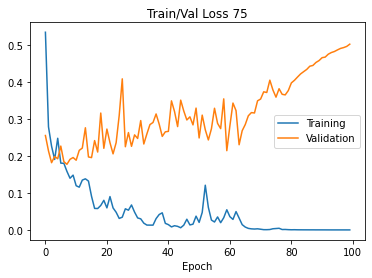

              precision    recall  f1-score   support

         0.0      0.963     0.967     0.965       508
         1.0      0.793     0.765     0.778        85
         2.0      0.826     0.844     0.835        45

    accuracy                          0.931       638
   macro avg      0.861     0.859     0.859       638
weighted avg      0.930     0.931     0.931       638



In [236]:
y_hat = experiment_controller.predict(X_test)
# print(np.argmax(y_hat, axis=1))
experiment_controller.plot_model_loss()
print(experiment_controller.classification_report(X_test, y_test))

#### Try Class Weight because of Data Imbalanced

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 2s 73ms/step - loss: 0.7196 - sparse_categorical_accuracy: 0.7336 - val_loss: 0.4450 - val_sparse_categorical_accuracy: 0.8054

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.80537, saving model to ./fetal_health/experiment_75\checkpoint_75
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4684 - sparse_categorical_accuracy: 0.8218 - val_loss: 0.2894 - val_sparse_categorical_accuracy: 0.8792

Epoch 00002: val_sparse_categorical_accuracy improved from 0.80537 to 0.87919, saving model to ./fetal_health/experiment_75\checkpoint_75
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.8504 - val_loss: 0.3973 - val_sparse_categorical_accuracy: 0.8389

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.87919
Epoch 4/100
19/19 [========================

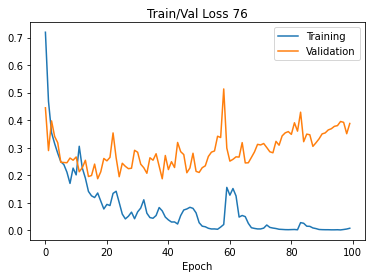

20/20 [==============================] - 0s 3ms/step - loss: 0.6884 - sparse_categorical_accuracy: 0.9263
(0.6883730888366699, 0.9263322949409485)
              precision    recall  f1-score   support

         0.0      0.964     0.961     0.963       508
         1.0      0.765     0.729     0.747        85
         2.0      0.804     0.911     0.854        45

    accuracy                          0.926       638
   macro avg      0.845     0.867     0.855       638
weighted avg      0.927     0.926     0.926       638



In [237]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(512, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(3, kernel_initializer = GlorotUniform()),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 1s 53ms/step - loss: 0.6895 - sparse_categorical_accuracy: 0.7244 - val_loss: 0.4726 - val_sparse_categorical_accuracy: 0.7886

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.78859, saving model to ./fetal_health/experiment_76\checkpoint_76
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4225 - sparse_categorical_accuracy: 0.8294 - val_loss: 0.2338 - val_sparse_categorical_accuracy: 0.8993

Epoch 00002: val_sparse_categorical_accuracy improved from 0.78859 to 0.89933, saving model to ./fetal_health/experiment_76\checkpoint_76
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3576 - sparse_categorical_accuracy: 0.8479 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.8691

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.89933
Epoch 4/100
19/19 [========================

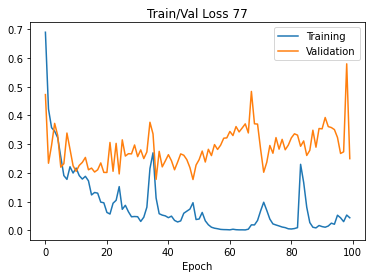

20/20 [==============================] - 0s 4ms/step - loss: 0.4164 - sparse_categorical_accuracy: 0.9107
(0.4163637161254883, 0.9106582999229431)
              precision    recall  f1-score   support

         0.0      0.962     0.943     0.952       508
         1.0      0.705     0.788     0.744        85
         2.0      0.778     0.778     0.778        45

    accuracy                          0.911       638
   macro avg      0.815     0.836     0.825       638
weighted avg      0.915     0.911     0.912       638



In [238]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(3, kernel_initializer = GlorotUniform()),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

#### Adding Early Stopping

In [239]:
experiment_controller = experiment_controller.add_callback(_get_early_stopping_cb)

In [240]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(3, kernel_initializer = GlorotUniform()),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

Epoch 1/100
19/19 [==============================] - 2s 75ms/step - loss: 0.6831 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.4071 - val_sparse_categorical_accuracy: 0.8725

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.87248, saving model to ./fetal_health/experiment_77\checkpoint_77
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4498 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.8926

Epoch 00002: val_sparse_categorical_accuracy improved from 0.87248 to 0.89262, saving model to ./fetal_health/experiment_77\checkpoint_77
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.4146 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.3849 - val_sparse_categorical_accuracy: 0.8624

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.89262
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3567 - sparse_categorical_accuracy: 0

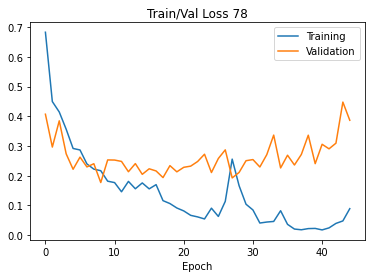

20/20 [==============================] - 0s 4ms/step - loss: 0.3701 - sparse_categorical_accuracy: 0.9185
(0.3700628876686096, 0.9184952974319458)
              precision    recall  f1-score   support

         0.0      0.973     0.937     0.955       508
         1.0      0.701     0.800     0.747        85
         2.0      0.808     0.933     0.866        45

    accuracy                          0.918       638
   macro avg      0.827     0.890     0.856       638
weighted avg      0.925     0.918     0.921       638



In [241]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

#### Adding Bias

Epoch 1/100
19/19 [==============================] - 1s 56ms/step - loss: 0.6587 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.4278 - val_sparse_categorical_accuracy: 0.8221

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82215, saving model to ./fetal_health/experiment_78\checkpoint_78
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3976 - sparse_categorical_accuracy: 0.8319 - val_loss: 0.4268 - val_sparse_categorical_accuracy: 0.8456

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82215 to 0.84564, saving model to ./fetal_health/experiment_78\checkpoint_78
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.2645 - val_sparse_categorical_accuracy: 0.8859

Epoch 00003: val_sparse_categorical_accuracy improved from 0.84564 to 0.88591, saving model to ./fetal_health/experiment_78\checkpoint_78
Epoch 4/100
19/19 [=============================

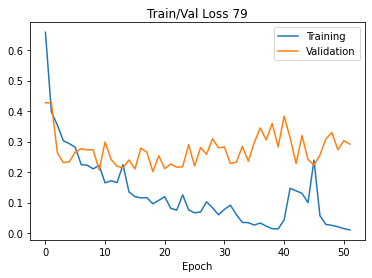

20/20 [==============================] - 0s 3ms/step - loss: 0.4861 - sparse_categorical_accuracy: 0.9154
(0.48614808917045593, 0.9153605103492737)
              precision    recall  f1-score   support

         0.0      0.975     0.937     0.956       508
         1.0      0.676     0.812     0.738        85
         2.0      0.812     0.867     0.839        45

    accuracy                          0.915       638
   macro avg      0.821     0.872     0.844       638
weighted avg      0.924     0.915     0.919       638



In [242]:
bias_initializer = 'zeros'
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dense(512, activation='relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dense(3, kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

#### Changing Model and Adding Dropout Layers

In [243]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(512, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(3, kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

Epoch 1/100
19/19 [==============================] - 2s 74ms/step - loss: 0.7466 - sparse_categorical_accuracy: 0.6597 - val_loss: 0.5503 - val_sparse_categorical_accuracy: 0.7987

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.79866, saving model to ./fetal_health/experiment_79\checkpoint_79
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.4660 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.3733 - val_sparse_categorical_accuracy: 0.8490

Epoch 00002: val_sparse_categorical_accuracy improved from 0.79866 to 0.84899, saving model to ./fetal_health/experiment_79\checkpoint_79
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3801 - sparse_categorical_accuracy: 0.8387 - val_loss: 0.3135 - val_sparse_categorical_accuracy: 0.8758

Epoch 00003: val_sparse_categorical_accuracy improved from 0.84899 to 0.87584, saving model to ./fetal_health/experiment_79\checkpoint_79
Epoch 4/100
19/19 [============================

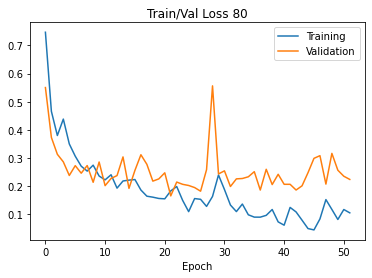

20/20 [==============================] - 0s 6ms/step - loss: 0.3945 - sparse_categorical_accuracy: 0.8887
(0.39447858929634094, 0.8887147307395935)
              precision    recall  f1-score   support

         0.0      0.983     0.902     0.940       508
         1.0      0.600     0.847     0.702        85
         2.0      0.712     0.822     0.763        45

    accuracy                          0.889       638
   macro avg      0.765     0.857     0.802       638
weighted avg      0.913     0.889     0.896       638



In [244]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

**Se puede observar una mejora en el sobreajuste del modelo modelo con el dropout. Se reduce la diferencia entre al reduccion de la funcion de costo en el data set de entrenamiento y en el data set de validacion**

#### Init with a GlorotNormal

In [245]:
bias_initializer = GlorotNormal()
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


Epoch 1/100
19/19 [==============================] - 2s 71ms/step - loss: 0.7627 - sparse_categorical_accuracy: 0.6504 - val_loss: 0.4753 - val_sparse_categorical_accuracy: 0.8154

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81544, saving model to ./fetal_health/experiment_80\checkpoint_80
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4383 - sparse_categorical_accuracy: 0.8378 - val_loss: 0.4125 - val_sparse_categorical_accuracy: 0.8289

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81544 to 0.82886, saving model to ./fetal_health/experiment_80\checkpoint_80
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3614 - sparse_categorical_accuracy: 0.8513 - val_loss: 0.2934 - val_sparse_categorical_accuracy: 0.8826

Epoch 00003: val_sparse_categorical_accuracy improved from 0.82886 to 0.88255, saving model to ./fetal_health/experiment_80\checkpoint_80
Epoch 4/100
19/19 [=============================

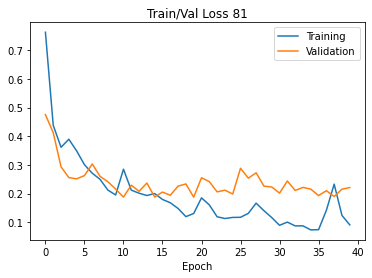

20/20 [==============================] - 0s 4ms/step - loss: 0.3655 - sparse_categorical_accuracy: 0.8950
(0.36550700664520264, 0.8949843049049377)
              precision    recall  f1-score   support

         0.0      0.973     0.917     0.944       508
         1.0      0.619     0.824     0.707        85
         2.0      0.761     0.778     0.769        45

    accuracy                          0.895       638
   macro avg      0.784     0.840     0.807       638
weighted avg      0.911     0.895     0.900       638



In [246]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

#### Testing more layers, and less nodes Architecture

In [247]:
model = Sequential([
    Dense(64, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(128, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

Epoch 1/100
19/19 [==============================] - 2s 60ms/step - loss: 1.0401 - sparse_categorical_accuracy: 0.4840 - val_loss: 0.8478 - val_sparse_categorical_accuracy: 0.8389

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83893, saving model to ./fetal_health/experiment_81\checkpoint_81
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9224 - sparse_categorical_accuracy: 0.6042 - val_loss: 0.8282 - val_sparse_categorical_accuracy: 0.7752

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.83893
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.8113 - sparse_categorical_accuracy: 0.6966 - val_loss: 0.7205 - val_sparse_categorical_accuracy: 0.8121

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.83893
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.7228 - sparse_categorical_accuracy: 0.7361 - val_loss: 0.5705 - val_sparse_categorical_accuracy: 0.85

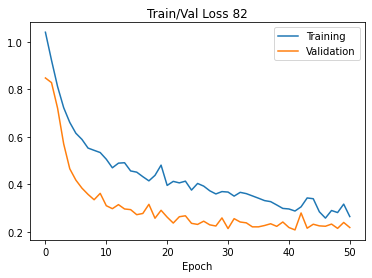

20/20 [==============================] - 0s 3ms/step - loss: 0.3336 - sparse_categorical_accuracy: 0.8699
(0.333589643239975, 0.869905948638916)
              precision    recall  f1-score   support

         0.0      0.980     0.886     0.931       508
         1.0      0.563     0.835     0.673        85
         2.0      0.642     0.756     0.694        45

    accuracy                          0.870       638
   macro avg      0.728     0.826     0.766       638
weighted avg      0.901     0.870     0.880       638



In [248]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

Epoch 1/100
19/19 [==============================] - 2s 73ms/step - loss: 1.3190 - sparse_categorical_accuracy: 0.3134 - val_loss: 1.1270 - val_sparse_categorical_accuracy: 0.2517

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.25168, saving model to ./fetal_health/experiment_82\checkpoint_82
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 1.0235 - sparse_categorical_accuracy: 0.3378 - val_loss: 1.0763 - val_sparse_categorical_accuracy: 0.2987

Epoch 00002: val_sparse_categorical_accuracy improved from 0.25168 to 0.29866, saving model to ./fetal_health/experiment_82\checkpoint_82
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9265 - sparse_categorical_accuracy: 0.4000 - val_loss: 0.9679 - val_sparse_categorical_accuracy: 0.4396

Epoch 00003: val_sparse_categorical_accuracy improved from 0.29866 to 0.43960, saving model to ./fetal_health/experiment_82\checkpoint_82
Epoch 4/100
19/19 [=============================

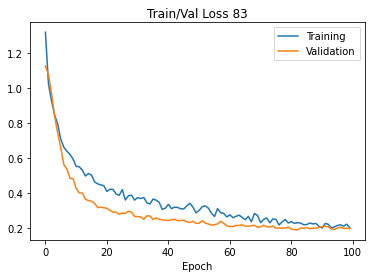

20/20 [==============================] - 0s 4ms/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8840
(0.3890725374221802, 0.8840125203132629)
              precision    recall  f1-score   support

         0.0      0.989     0.888     0.936       508
         1.0      0.603     0.859     0.709        85
         2.0      0.656     0.889     0.755        45

    accuracy                          0.884       638
   macro avg      0.749     0.879     0.800       638
weighted avg      0.914     0.884     0.893       638



In [249]:
model = Sequential([
    Dense(64, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 2s 63ms/step - loss: 0.7282 - sparse_categorical_accuracy: 0.6765 - val_loss: 0.4260 - val_sparse_categorical_accuracy: 0.8255

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82550, saving model to ./fetal_health/experiment_83\checkpoint_83
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4356 - sparse_categorical_accuracy: 0.8202 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.8423

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82550 to 0.84228, saving model to ./fetal_health/experiment_83\checkpoint_83
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8471 - val_loss: 0.4180 - val_sparse_categorical_accuracy: 0.8423

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.84228
Epoch 4/100
19/19 [========================

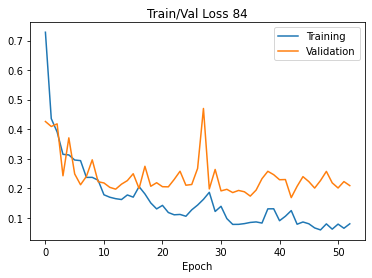

20/20 [==============================] - 0s 4ms/step - loss: 0.3993 - sparse_categorical_accuracy: 0.9091
(0.39932963252067566, 0.9090909361839294)
              precision    recall  f1-score   support

         0.0      0.977     0.925     0.950       508
         1.0      0.655     0.871     0.747        85
         2.0      0.818     0.800     0.809        45

    accuracy                          0.909       638
   macro avg      0.817     0.865     0.836       638
weighted avg      0.923     0.909     0.913       638



In [250]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 2s 80ms/step - loss: 0.9135 - sparse_categorical_accuracy: 0.4429 - val_loss: 0.6247 - val_sparse_categorical_accuracy: 0.7517

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.75168, saving model to ./fetal_health/experiment_84\checkpoint_84
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.5396 - sparse_categorical_accuracy: 0.7908 - val_loss: 0.4420 - val_sparse_categorical_accuracy: 0.8356

Epoch 00002: val_sparse_categorical_accuracy improved from 0.75168 to 0.83557, saving model to ./fetal_health/experiment_84\checkpoint_84
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4706 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8725

Epoch 00003: val_sparse_categorical_accuracy improved from 0.83557 to 0.87248, saving model to ./fetal_health/experim

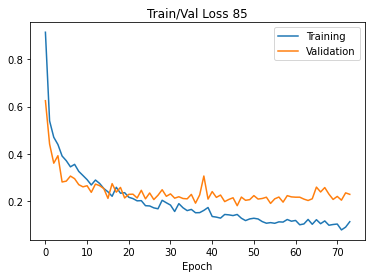

20/20 [==============================] - 0s 4ms/step - loss: 0.4127 - sparse_categorical_accuracy: 0.8981
(0.41270771622657776, 0.8981191515922546)
              precision    recall  f1-score   support

         0.0      0.983     0.907     0.944       508
         1.0      0.613     0.859     0.716        85
         2.0      0.780     0.867     0.821        45

    accuracy                          0.898       638
   macro avg      0.792     0.878     0.827       638
weighted avg      0.919     0.898     0.905       638



In [251]:
model = Sequential([
    Dense(256, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 2s 55ms/step - loss: 0.7318 - sparse_categorical_accuracy: 0.7235 - val_loss: 0.3595 - val_sparse_categorical_accuracy: 0.8859

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.88591, saving model to ./fetal_health/experiment_85\checkpoint_85
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4702 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.8624

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.88591
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4346 - sparse_categorical_accuracy: 0.8378 - val_loss: 0.3586 - val_sparse_categorical_accuracy: 0.8691

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.88591
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3497 - sparse_categorical_accura

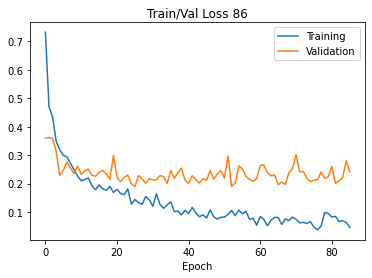

20/20 [==============================] - 0s 3ms/step - loss: 0.5285 - sparse_categorical_accuracy: 0.9216
(0.5284700393676758, 0.9216300845146179)
              precision    recall  f1-score   support

         0.0      0.980     0.945     0.962       508
         1.0      0.723     0.800     0.760        85
         2.0      0.741     0.889     0.808        45

    accuracy                          0.922       638
   macro avg      0.815     0.878     0.843       638
weighted avg      0.929     0.922     0.924       638



In [252]:
model = Sequential([
    Dense(512, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 1s 52ms/step - loss: 0.6234 - sparse_categorical_accuracy: 0.7605 - val_loss: 0.3371 - val_sparse_categorical_accuracy: 0.8859

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.88591, saving model to ./fetal_health/experiment_86\checkpoint_86
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.4151 - sparse_categorical_accuracy: 0.8328 - val_loss: 0.2993 - val_sparse_categorical_accuracy: 0.8893

Epoch 00002: val_sparse_categorical_accuracy improved from 0.88591 to 0.88926, saving model to ./fetal_health/experiment_86\checkpoint_86
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3351 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.2531 - val_sparse_categorical_accuracy: 0.8926

Epoch 00003: val_sparse_categorical_accuracy improved from 0.88926 to 0.89262, saving model to ./fetal_health/experim

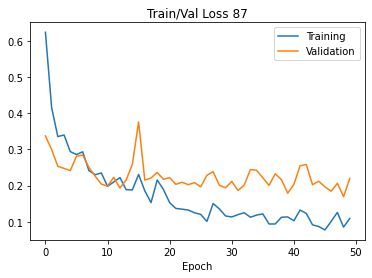

20/20 [==============================] - 0s 4ms/step - loss: 0.3761 - sparse_categorical_accuracy: 0.9091
(0.37608516216278076, 0.9090909361839294)
              precision    recall  f1-score   support

         0.0      0.962     0.939     0.950       508
         1.0      0.670     0.788     0.724        85
         2.0      0.857     0.800     0.828        45

    accuracy                          0.909       638
   macro avg      0.830     0.842     0.834       638
weighted avg      0.915     0.909     0.911       638



In [253]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

{0: 0.4281973816717019, 1: 2.4022598870056497, 2: 4.026515151515151}
Epoch 1/100
19/19 [==============================] - 2s 84ms/step - loss: 0.8191 - sparse_categorical_accuracy: 0.7050 - val_loss: 0.3515 - val_sparse_categorical_accuracy: 0.8725

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.87248, saving model to ./fetal_health/experiment_87\checkpoint_87
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.5324 - sparse_categorical_accuracy: 0.8118 - val_loss: 0.4414 - val_sparse_categorical_accuracy: 0.8389

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.87248
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4236 - sparse_categorical_accuracy: 0.8328 - val_loss: 0.2795 - val_sparse_categorical_accuracy: 0.8926

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87248 to 0.89262, saving model to ./fetal_health/experiment_87\checkpoint_87
Epoch 4/100
19/19 [========================

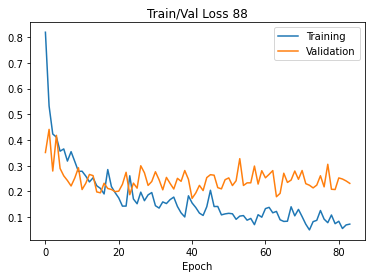

20/20 [==============================] - 0s 4ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.9389
(0.3956565260887146, 0.9388715028762817)
              precision    recall  f1-score   support

         0.0      0.980     0.955     0.967       508
         1.0      0.768     0.859     0.811        85
         2.0      0.854     0.911     0.882        45

    accuracy                          0.939       638
   macro avg      0.867     0.908     0.887       638
weighted avg      0.943     0.939     0.940       638



In [254]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
print(class_weights)
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

Epoch 1/100
19/19 [==============================] - 3s 107ms/step - loss: 0.8575 - sparse_categorical_accuracy: 0.7353 - val_loss: 0.7695 - val_sparse_categorical_accuracy: 0.7785

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.77852, saving model to ./fetal_health/experiment_88\checkpoint_88
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.8109 - val_loss: 0.5309 - val_sparse_categorical_accuracy: 0.8523

Epoch 00002: val_sparse_categorical_accuracy improved from 0.77852 to 0.85235, saving model to ./fetal_health/experiment_88\checkpoint_88
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.3932 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.4298 - val_sparse_categorical_accuracy: 0.8691

Epoch 00003: val_sparse_categorical_accuracy improved from 0.85235 to 0.86913, saving model to ./fetal_health/experiment_88\checkpoint_88
Epoch 4/100
19/19 [==========================

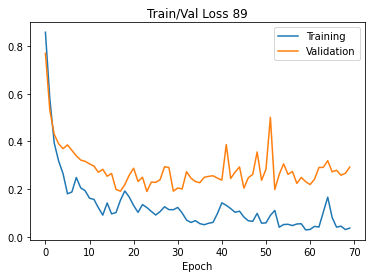

20/20 [==============================] - 0s 4ms/step - loss: 0.3726 - sparse_categorical_accuracy: 0.9232
(0.3726496398448944, 0.9231975078582764)
              precision    recall  f1-score   support

         0.0      0.968     0.947     0.957       508
         1.0      0.730     0.765     0.747        85
         2.0      0.827     0.956     0.887        45

    accuracy                          0.923       638
   macro avg      0.842     0.889     0.864       638
weighted avg      0.926     0.923     0.924       638



In [255]:
bias_initializer = GlorotNormal()
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    BatchNormalization(),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

Epoch 1/100
19/19 [==============================] - 2s 67ms/step - loss: 0.8629 - sparse_categorical_accuracy: 0.5487 - val_loss: 0.3844 - val_sparse_categorical_accuracy: 0.8557

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85570, saving model to ./fetal_health/experiment_89\checkpoint_89
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4480 - sparse_categorical_accuracy: 0.8109 - val_loss: 0.4535 - val_sparse_categorical_accuracy: 0.8289

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.85570
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4412 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.3021 - val_sparse_categorical_accuracy: 0.8591

Epoch 00003: val_sparse_categorical_accuracy improved from 0.85570 to 0.85906, saving model to ./fetal_health/experiment_89\checkpoint_89
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0

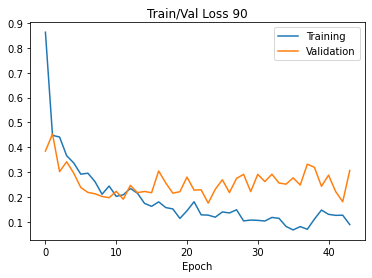

20/20 [==============================] - 0s 4ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8997
(0.3597315847873688, 0.8996865153312683)
              precision    recall  f1-score   support

         0.0      0.965     0.927     0.946       508
         1.0      0.636     0.824     0.718        85
         2.0      0.825     0.733     0.776        45

    accuracy                          0.900       638
   macro avg      0.809     0.828     0.813       638
weighted avg      0.911     0.900     0.903       638



In [256]:
bias_initializer = GlorotNormal()
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

Epoch 1/100
19/19 [==============================] - 2s 74ms/step - loss: 0.9205 - sparse_categorical_accuracy: 0.5471 - val_loss: 0.5390 - val_sparse_categorical_accuracy: 0.7752

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.77517, saving model to ./fetal_health/experiment_90\checkpoint_90
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.5029 - sparse_categorical_accuracy: 0.8143 - val_loss: 0.4233 - val_sparse_categorical_accuracy: 0.8591

Epoch 00002: val_sparse_categorical_accuracy improved from 0.77517 to 0.85906, saving model to ./fetal_health/experiment_90\checkpoint_90
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4566 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.2322 - val_sparse_categorical_accuracy: 0.9195

Epoch 00003: val_sparse_categorical_accuracy improved from 0.85906 to 0.91946, saving model to ./fetal_health/experiment_90\checkpoint_90
Epoch 4/100
19/19 [============================

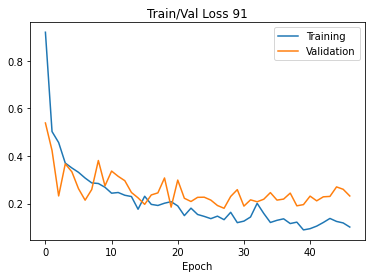

20/20 [==============================] - 0s 4ms/step - loss: 0.3517 - sparse_categorical_accuracy: 0.8934
(0.3517182469367981, 0.8934169411659241)
              precision    recall  f1-score   support

         0.0      0.977     0.907     0.941       508
         1.0      0.612     0.835     0.706        85
         2.0      0.760     0.844     0.800        45

    accuracy                          0.893       638
   macro avg      0.783     0.862     0.816       638
weighted avg      0.913     0.893     0.900       638



In [257]:
bias_initializer = GlorotNormal()
model = Sequential([
    Dense(512, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.2),
    Dense(3, kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
print("ExperimentId:", exp_id)
experiment_controller.plot_model_loss()
print(experiment_controller.test(X_test, y_test))
print(experiment_controller.classification_report(X_test, y_test))

#### Comparing Optimizers

Epoch 1/100
19/19 [==============================] - 2s 76ms/step - loss: 0.7826 - sparse_categorical_accuracy: 0.5840 - val_loss: 0.4302 - val_sparse_categorical_accuracy: 0.8456

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.84564, saving model to ./fetal_health/experiment_91\checkpoint_91
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.4949 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.3065 - val_sparse_categorical_accuracy: 0.8826

Epoch 00002: val_sparse_categorical_accuracy improved from 0.84564 to 0.88255, saving model to ./fetal_health/experiment_91\checkpoint_91
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4618 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.8423

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.88255
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3895 - sparse_categorical_accuracy: 

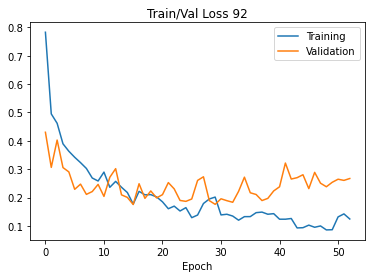

20/20 [==============================] - 0s 4ms/step - loss: 0.4313 - sparse_categorical_accuracy: 0.9107
              precision    recall  f1-score   support

         0.0      0.983     0.919     0.950       508
         1.0      0.661     0.894     0.760        85
         2.0      0.792     0.844     0.817        45

    accuracy                          0.911       638
   macro avg      0.812     0.886     0.842       638
weighted avg      0.927     0.911     0.915       638

Results:  adam   92   (0.43129298090934753, 0.9106582999229431)
Epoch 1/100
19/19 [==============================] - 3s 103ms/step - loss: 0.1330 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.2184 - val_sparse_categorical_accuracy: 0.9262

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92617, saving model to ./fetal_health/experiment_92\checkpoint_92
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9462 - val_loss: 0

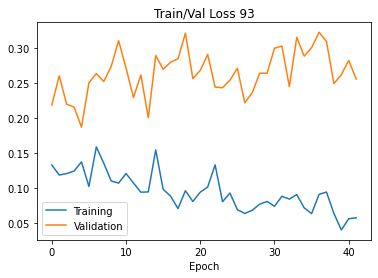

20/20 [==============================] - 0s 4ms/step - loss: 0.6510 - sparse_categorical_accuracy: 0.9122
              precision    recall  f1-score   support

         0.0      0.981     0.927     0.953       508
         1.0      0.704     0.812     0.754        85
         2.0      0.700     0.933     0.800        45

    accuracy                          0.912       638
   macro avg      0.795     0.891     0.836       638
weighted avg      0.924     0.912     0.916       638

Results:  nadam   93   (0.6510431170463562, 0.9122257232666016)
Epoch 1/100
19/19 [==============================] - 2s 65ms/step - loss: 0.1344 - sparse_categorical_accuracy: 0.9571 - val_loss: 0.2362 - val_sparse_categorical_accuracy: 0.9430

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.94295, saving model to ./fetal_health/experiment_93\checkpoint_93
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.2

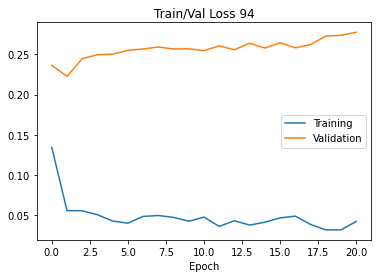

20/20 [==============================] - 0s 4ms/step - loss: 0.5550 - sparse_categorical_accuracy: 0.9154
              precision    recall  f1-score   support

         0.0      0.975     0.931     0.953       508
         1.0      0.676     0.859     0.756        85
         2.0      0.844     0.844     0.844        45

    accuracy                          0.915       638
   macro avg      0.832     0.878     0.851       638
weighted avg      0.926     0.915     0.919       638

Results:  adamax   94   (0.5550374984741211, 0.9153605103492737)
Epoch 1/100
19/19 [==============================] - 2s 72ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.2336 - val_sparse_categorical_accuracy: 0.9430

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.94295, saving model to ./fetal_health/experiment_94\checkpoint_94
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0880 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.

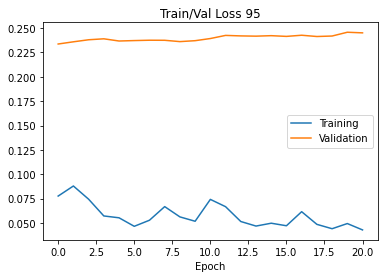

20/20 [==============================] - 0s 4ms/step - loss: 0.5528 - sparse_categorical_accuracy: 0.9138
              precision    recall  f1-score   support

         0.0      0.973     0.935     0.954       508
         1.0      0.680     0.824     0.745        85
         2.0      0.809     0.844     0.826        45

    accuracy                          0.914       638
   macro avg      0.820     0.868     0.842       638
weighted avg      0.923     0.914     0.917       638

Results:  adagrad   95   (0.5527962446212769, 0.9137930870056152)
Epoch 1/100
19/19 [==============================] - 2s 80ms/step - loss: 0.0556 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.2336 - val_sparse_categorical_accuracy: 0.9396

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93960, saving model to ./fetal_health/experiment_95\checkpoint_95
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9697 - val_loss: 0

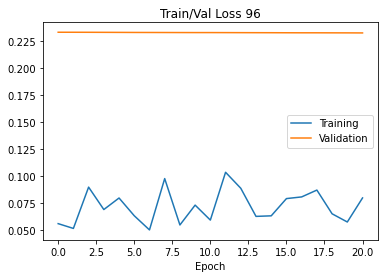

20/20 [==============================] - 0s 4ms/step - loss: 0.5526 - sparse_categorical_accuracy: 0.9138
              precision    recall  f1-score   support

         0.0      0.973     0.935     0.954       508
         1.0      0.680     0.824     0.745        85
         2.0      0.809     0.844     0.826        45

    accuracy                          0.914       638
   macro avg      0.820     0.868     0.842       638
weighted avg      0.923     0.914     0.917       638

Results:  adadelta   96   (0.5525619387626648, 0.9137930870056152)
Epoch 1/100
19/19 [==============================] - 2s 66ms/step - loss: 0.1471 - sparse_categorical_accuracy: 0.9513 - val_loss: 0.3079 - val_sparse_categorical_accuracy: 0.9295

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92953, saving model to ./fetal_health/experiment_96\checkpoint_96
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9605 - val_loss: 

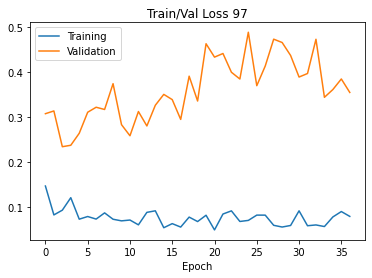

20/20 [==============================] - 0s 4ms/step - loss: 0.6704 - sparse_categorical_accuracy: 0.9138
              precision    recall  f1-score   support

         0.0      0.966     0.945     0.955       508
         1.0      0.677     0.788     0.728        85
         2.0      0.857     0.800     0.828        45

    accuracy                          0.914       638
   macro avg      0.833     0.844     0.837       638
weighted avg      0.920     0.914     0.916       638

Results:  rmsprop   97   (0.6704205274581909, 0.9137930870056152)


In [258]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer = GlorotNormal(), use_bias=True, bias_initializer=bias_initializer),
    Dropout(0.3),
    Dense(3, kernel_initializer = GlorotUniform(), use_bias=True, bias_initializer=bias_initializer),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

for optimizer in ['adam', 'nadam', 'adamax', 'adagrad', 'adadelta', 'rmsprop']:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])
    model, exp_id = experiment_controller.run_experiment(model, X_train, y_train, class_weight=class_weights)
    print("ExperimentId:", exp_id, optimizer)
    experiment_controller.plot_model_loss()
    res = experiment_controller.test(X_test, y_test)
    print(experiment_controller.classification_report(X_test, y_test))
    print("Results: ", optimizer, " ", exp_id, " ", res)

**Adam parece ser el optimizador que mejor minimiza las funcion de costo para este problema**

In [263]:
experiment_controller.summary_experiments().sort_values("val_sparse_categorical_accuracy", ascending=False)[0:10]

,ExperimentID,Datetime,train_sparse_categorical_accuracy,val_sparse_categorical_accuracy
44,45,20210922-01:19:23,0.983193,0.946309
22,23,20210922-01:05:42,0.988235,0.946309
40,41,20210922-01:18:47,0.975630,0.942953
34,35,20210922-01:17:35,0.979832,0.942953
5,6,20210922-01:02:36,0.999160,0.942953
87,88,20210922-11:10:16,0.970588,0.942953
20,21,20210922-01:05:28,0.991597,0.942953
27,28,20210922-01:16:04,0.999160,0.939597
3,4,20210922-01:00:38,0.999160,0.939597
92,93,20210922-11:11:35,0.971429,0.939597


In [262]:
experiment_controller.compare_test_results().sort_values("custom_metric", ascending=False)[0:10]

,ExperimentID,Datetime,test_loss,test_sparse_categorical_accuracy,custom_metric
44,52,20210922-10:43:17,0.523971,0.938872,0.939640
79,88,20210922-11:10:16,0.395657,0.938872,0.937448
43,51,20210922-10:42:56,0.571759,0.932602,0.933418
0,6,20210922-01:02:37,0.622141,0.929467,0.928964
67,76,20210922-11:07:15,0.688373,0.926332,0.926498
36,43,20210922-01:19:09,0.618986,0.926332,0.925434
20,27,20210922-01:15:44,0.540176,0.926332,0.924742
10,16,20210922-01:04:26,0.352599,0.924765,0.924526
38,45,20210922-01:19:24,0.621478,0.924765,0.923911
37,44,20210922-01:19:16,0.621410,0.924765,0.923911


In [275]:
experiment_controller.set_current_model(88)
best_model = experiment_controller.get_model()
print(best_model.summary())
print(experiment_controller.classification_report(X_test, y_test))

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 1024)              22528     
_________________________________________________________________
dropout_143 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_333 (Dense)            (None, 128)               131200    
_________________________________________________________________
dropout_144 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_334 (Dense)            (None, 1024)              132096    
_________________________________________________________________
dropout_145 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_335 (Dense)            (None, 128)             

**El experimento 88 es el que se ha reducido mas la funcion de costo y el weighted f1 score para la data desbalanceada presenta un 94% en el set de pruebas**

In [261]:
%load_ext tensorboard
%tensorboard --logdir=fetal_health/logs/tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13468), started 0:24:24 ago. (Use '!kill 13468' to kill it.)